# Praktikum Pertemuan 10 | Praktikum Mandiri

**Nama: Reva Aulia Faradilah**

**NIM: 0110222145**

**Kelas: ML Pagi - 2022**

---

# Latihan 1

**1. Import Library**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.preprocessing import LabelEncoder

**2. Dataset**

In [5]:
# Membuat dataset training
data = {
    "Temperatur Udara": [10, 25, 15, 20, 18, 20, 22, 24],
    "Kecepatan Angin":      [0,  0,  5,  3,  7, 10,  5,  6],
    "Klasifikasi":      ["Dingin","Panas","Dingin","Panas","Dingin","Dingin","Panas","Panas"]
}

data_train = pd.DataFrame(data)
data_train

,Temperatur Udara,Kecepatan Angin,Klasifikasi
0,10,0,Dingin
1,25,0,Panas
2,15,5,Dingin
3,20,3,Panas
4,18,7,Dingin
5,20,10,Dingin
6,22,5,Panas
7,24,6,Panas


**3. Memisahkan fitur (X) dan target (y)**

In [6]:
# Memisahkan fitur (X) dan target (y)
X = data_train[["Temperatur Udara", "Kecepatan Angin"]]
y = data_train["Klasifikasi"]

display(X)
display(y)

,Temperatur Udara,Kecepatan Angin
0,10,0
1,25,0
2,15,5
3,20,3
4,18,7
5,20,10
6,22,5
7,24,6


,Klasifikasi
0,Dingin
1,Panas
2,Dingin
3,Panas
4,Dingin
5,Dingin
6,Panas
7,Panas


**4. Normalisasi Fitur**

In [7]:
# Normalisasi Fitur
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-2.00956415, -1.40556386],
       [ 1.24918853, -1.40556386],
       [-0.92331326,  0.15617376],
       [ 0.16293763, -0.46852129],
       [-0.27156272,  0.78086881],
       [ 0.16293763,  1.71791138],
       [ 0.59743799,  0.15617376],
       [ 1.03193835,  0.46852129]])

**5. Mencari nilai K terbaik**

In [11]:
# Mencari nilai K terbaik
loo = LeaveOneOut()

k_list = [1,2,3,4,5,6,7]
akurasi = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_scaled, y, cv=loo)
    akurasi.append(score.mean())

for k, acc in zip(k_list, akurasi):
    print(f"k-{k} -> akurasi k = {acc:.2f}")

best_k = k_list[np.argmax(akurasi)]
print("\n K terbaik adalah =", best_k)


k-1 -> akurasi k = 1.00
k-2 -> akurasi k = 0.88
k-3 -> akurasi k = 0.75
k-4 -> akurasi k = 0.62
k-5 -> akurasi k = 0.50
k-6 -> akurasi k = 0.12
k-7 -> akurasi k = 0.00

 K terbaik adalah = 1


**6. Visualisasi K terbaik**

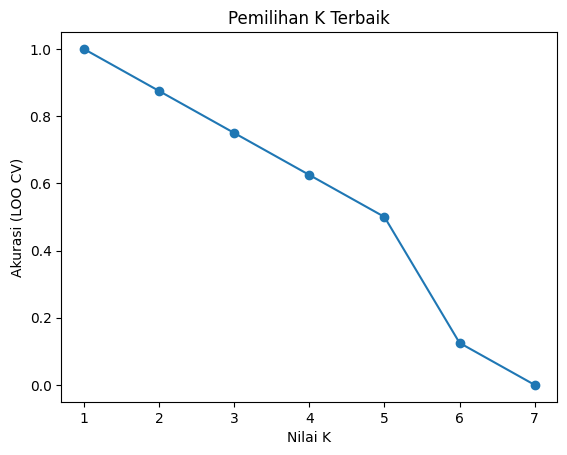

In [12]:
# Visualisasi K terbaik
plt.figure()
plt.plot(k_list, akurasi, marker="o")
plt.xticks(k_list)
plt.xlabel("Nilai K")
plt.ylabel("Akurasi (LOO CV)")
plt.title("Pemilihan K Terbaik")
plt.show()

**7. Train model dengan K terbaik**

In [13]:
# Train model dengan K terbaik
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_scaled, y)

KNeighborsClassifier(n_neighbors=1)

**8. Prediksi data test**

In [15]:
# Prediksi data test
data_test = pd.DataFrame({"Temperatur Udara":[16], "Kecepatan Angin":[3]})

data_test_scaled = scaler.transform(data_test)
prediksi = model.predict(data_test_scaled)

print("Data test:", data_test.values)
print("✅ Prediksi persepsi Marry untuk data test (16°C, 3 km/jam) =", prediksi[0])

Data test: [[16  3]]
✅ Prediksi persepsi Marry untuk data test (16°C, 3 km/jam) = Dingin


# Latihan 2

**1. Import Library**

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

**2. Dataset**

In [18]:
# Memasukkan data dari tabel yang ada di soal
data2 = {
    'NIM': ['TI001', 'TI002', 'TI003', 'TI004', 'TI005', 'TI006', 'TI007', 'TI008', 'TI009', 'TI010'],
    'Hasil Sebenarnya': ['Lulus', 'Lulus', 'Lulus', 'Lulus', 'Lulus', 'Tidak Lulus', 'Tidak Lulus', 'Tidak Lulus', 'Tidak Lulus', 'Tidak Lulus'],
    'Hasil Prediksi': ['Lulus', 'Lulus', 'Lulus', 'Tidak Lulus', 'Tidak Lulus', 'Lulus', 'Tidak Lulus', 'Tidak Lulus', 'Tidak Lulus', 'Tidak Lulus']
}
df2= pd.DataFrame(data2)
df2

,NIM,Hasil Sebenarnya,Hasil Prediksi
0,TI001,Lulus,Lulus
1,TI002,Lulus,Lulus
2,TI003,Lulus,Lulus
3,TI004,Lulus,Tidak Lulus
4,TI005,Lulus,Tidak Lulus
5,TI006,Tidak Lulus,Lulus
6,TI007,Tidak Lulus,Tidak Lulus
7,TI008,Tidak Lulus,Tidak Lulus
8,TI009,Tidak Lulus,Tidak Lulus
9,TI010,Tidak Lulus,Tidak Lulus


**3. Label aktual (y_true) dan prediksi (y_pred)**

In [19]:
# Label aktual (y_true) dan prediksi (y_pred)
y_true = df2['Hasil Sebenarnya']
y_pred = df2['Hasil Prediksi']

labels = ['Lulus', 'Tidak Lulus']

print("Data Aktual vs Prediksi:")
display(df2[['Hasil Sebenarnya', 'Hasil Prediksi']])

Data Aktual vs Prediksi:


,Hasil Sebenarnya,Hasil Prediksi
0,Lulus,Lulus
1,Lulus,Lulus
2,Lulus,Lulus
3,Lulus,Tidak Lulus
4,Lulus,Tidak Lulus
5,Tidak Lulus,Lulus
6,Tidak Lulus,Tidak Lulus
7,Tidak Lulus,Tidak Lulus
8,Tidak Lulus,Tidak Lulus
9,Tidak Lulus,Tidak Lulus


**4. Confusion Matrix**

In [20]:
# Hitung Confusion Matrix
cm = confusion_matrix(y_true, y_pred, labels=labels)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

print("\nConfusion Matrix:")
display(cm_df)


Confusion Matrix:


,Lulus,Tidak Lulus
Lulus,3,2
Tidak Lulus,1,4


**5. Visualisasi confusion matrix**

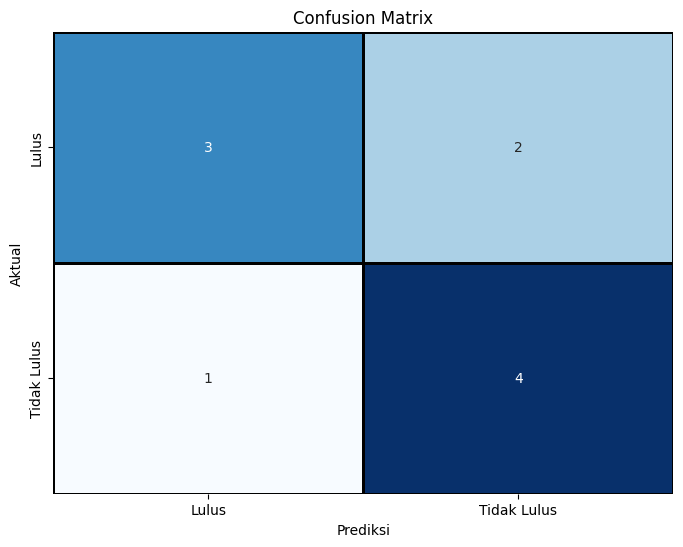

In [25]:
# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=1, linecolor='black')
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

6. Hasil perhitungan metrik akurasi

In [26]:
# Hitung Akurasi
accuracy = accuracy_score(y_true, y_pred)

# Hitung Precision
precision = precision_score(y_true, y_pred, pos_label='Lulus')

# Hitung Recall
recall = recall_score(y_true, y_pred, pos_label='Lulus')

# Buat DataFrame untuk metrik evaluasi
metrics = pd.DataFrame({
    'Metrics': ['Accuracy', 'Precision', 'Recall'],
    'Value': [f'{accuracy:.2f}', f'{precision:.2f}', f'{recall:.2f}']
})

print("\nHasil perhitungan metrik akurasi:")
display(metrics)


Hasil perhitungan metrik akurasi:


,Metrics,Value
0,Accuracy,0.70
1,Precision,0.75
2,Recall,0.60


# Latihan 3

**1. Import Library**

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings("ignore")

**2. Dataset**

In [30]:
# Menghubungkan dengan Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

# Memanggil dataset melalui gdrive
path = '/content/gdrive/MyDrive/MachineLearning/praktikum10/data/'

# Membaca file
df3 = pd.read_csv("/content/gdrive/MyDrive/MachineLearning/praktikum10/data/weather_classification_data.csv")
df3

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


**3. Informasi Umum Data**

In [31]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


**4. Missing Value**

In [34]:
df3.isna().sum()

,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation (%),0
Cloud Cover,0
Atmospheric Pressure,0
UV Index,0
Season,0
Visibility (km),0
Location,0


**5. Pisahkan fitur dan label**

In [36]:
df3 = df3.dropna()

# Pisahkan fitur (X) dan label (y)
X = df3.drop(columns=["Weather Type"])
y = df3["Weather Type"]

print(X.columns)
y.value_counts()

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location'],
      dtype='object')


,count
Weather Type,
Rainy,3300
Cloudy,3300
Sunny,3300
Snowy,3300


**6. Tentukan kolom numerik vs kategorikal**

In [37]:
# Tentukan kolom numerik vs kategorikal
num_cols = X.select_dtypes(include=["int64","float64"]).columns
cat_cols = X.select_dtypes(include=["object"]).columns

print("Numerik:", list(num_cols))
print("Kategorikal:", list(cat_cols))

Numerik: ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']
Kategorikal: ['Cloud Cover', 'Season', 'Location']


**7. Preprocessing**

In [38]:
# Preprocessing
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)

**8. Split data**

In [39]:
# Split data train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

**9. Hyperparameter tuning**

In [44]:
# Hyperparameter tuning
knn = KNeighborsClassifier()

pipe = Pipeline(steps=[
    ("prep", preprocess),
    ("knn", knn)
])

param_grid = {
    "knn__n_neighbors": list(range(1, 31)),
    "knn__weights": ["uniform", "distance"],
    "knn__metric": ["euclidean", "manhattan"]
}

grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

Best Params: {'knn__metric': 'euclidean', 'knn__n_neighbors': 7, 'knn__weights': 'uniform'}
Best CV Score: 0.8979166666666666


**10. Modeling**

In [45]:
# Melatih model terbaik & prediksi
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

#Evaluasi
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8958333333333334

Classification Report:
              precision    recall  f1-score   support

      Cloudy       0.83      0.90      0.86       660
       Rainy       0.88      0.89      0.88       660
       Snowy       0.93      0.91      0.92       660
       Sunny       0.95      0.88      0.92       660

    accuracy                           0.90      2640
   macro avg       0.90      0.90      0.90      2640
weighted avg       0.90      0.90      0.90      2640



**11. Confusion Matrix**

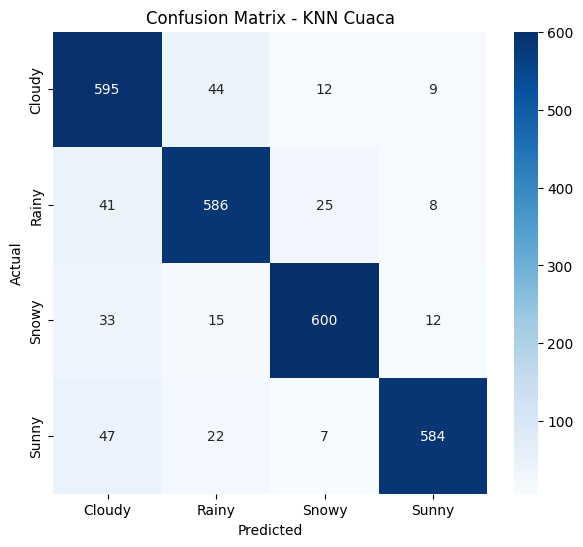

In [47]:
cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)
plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=best_model.classes_, yticklabels=best_model.classes_, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN Cuaca")
plt.show()

**12. Cross Validation**

In [48]:
# Cross-validation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)
print("CV mean:", cv_scores.mean())
print("CV std:", cv_scores.std())

CV mean: 0.8979166666666666
CV std: 0.004386831371932001
